# Introducción:

En el ámbito del aprendizaje automático, el algoritmo K-Means se ha convertido en una herramienta fundamental para la segmentación y agrupación de datos no etiquetados en clústeres con características similares. En este informe, exploraremos la aplicación de K-Means en un contexto inusual pero intrigante: el análisis de la personalidad de celebridades en Twitter.

El conjunto de datos empleado en esta investigación fue obtenido de un proyecto que analizaba los rasgos de personalidad de usuarios famosos en Twitter. El enfoque se basa en la metodología de psicología conocida como "Ocean: The Big Five", que evalúa cinco dimensiones de la personalidad: apertura a la experiencia, conciencia, extraversión, amabilidad y neuroticismo. Además, se incluyen medidas adicionales, como la cantidad promedio de palabras en sus tweets y la categoría de actividad laboral de los usuarios, que incluye a figuras destacadas en deportes, música, actuación y más.

En este informe, nos centraremos en la aplicación de K-Means utilizando tres dimensiones de personalidad: apertura a la experiencia, conciencia y extraversión. Si bien el conjunto de datos contiene ocho columnas de entrada, esta selección nos permitirá visualizar de manera efectiva los resultados en un espacio tridimensional y sus proyecciones bidimensionales.

La hipótesis que guía esta investigación es intrigante: ¿los grupos resultantes se relacionarán principalmente con la actividad laboral de estas celebridades, o podríamos descubrir que la personalidad es un factor más significativo en la formación de clústeres?

A través de este informe, se detallarán los pasos para aplicar el algoritmo K-Means, desde la preparación de datos hasta la interpretación de resultados. Además, se analizarán las ventajas y limitaciones de este enfoque en un contexto tan singular como el análisis de personalidades de celebridades en redes sociales.

Este estudio no solo ofrece una perspectiva única sobre la aplicación de K-Means, sino que también puede proporcionar información valiosa sobre la relación entre la personalidad y la ocupación en el mundo de la fama y la influencia en las redes sociales.


# K-Means 

El algoritmo K-Means es una técnica de aprendizaje no supervisado utilizada en el campo de la minería de datos y la inteligencia artificial para agrupar datos en clústeres o grupos similares en función de sus características. Su funcionamiento se basa en un proceso iterativo que busca minimizar la suma de las distancias euclidianas al cuadrado entre los puntos de datos y los centroides de los clústeres.

El funcionamiento matemático básico del algoritmo K-Means se puede resumir en los siguientes pasos:

1. Inicialización: Se seleccionan aleatoriamente K centroides iniciales, donde K es el número de clústeres que se desea crear.

2. Asignación de puntos: Cada punto de datos se asigna al clúster cuyo centroide está más cerca de él, generalmente calculando la distancia euclidiana.

3. Actualización de centroides: Se recalculan los centroides de cada clúster tomando como base los puntos asignados a ese clúster.

4. Repetición: Los pasos 2 y 3 se repiten hasta que los centroides de los clústeres convergen o hasta que se alcance un número máximo de iteraciones.

Ventajas de K-Means:
- Es un algoritmo simple y eficiente computacionalmente.
- Puede ser escalable a grandes conjuntos de datos.
- Es útil para la identificación de patrones y segmentación de datos en grupos homogéneos.

Desventajas de K-Means:
- Requiere definir previamente el número de clústeres K, lo que puede ser un desafío en algunos casos.
- Es sensible a la inicialización de los centroides y puede converger a óptimos locales.
- No es adecuado para datos con formas de clústeres no esféricas o de tamaños desiguales.

Aplicaciones en el mundo real:
- Segmentación de clientes en marketing y comercio electrónico para dirigir campañas específicas a grupos similares de usuarios.
- Análisis de documentos para agrupar noticias, documentos académicos o páginas web relacionadas.
- En ciencias de la salud, para identificar grupos de pacientes con características médicas similares.
- En visión por computadora, para comprimir imágenes y reducir el número de colores en una imagen.
- Análisis de redes sociales para identificar comunidades de usuarios con intereses similares.


# Importación de Bibliotecas:
   - `import pandas as pd`: Importa la biblioteca Pandas con un alias de "pd". Pandas se utiliza para la manipulación y análisis de datos estructurados, como los datos en forma de tablas o DataFrames.
   - `import numpy as np`: Importa la biblioteca NumPy con un alias de "np". NumPy es ampliamente utilizado para operaciones numéricas eficientes en Python, especialmente cuando se trabaja con matrices y arreglos multidimensionales.
   - `import matplotlib.pyplot as plt`: Importa la biblioteca Matplotlib para la generación de gráficos y visualización de datos. El alias "plt" es comúnmente utilizado para abreviar Matplotlib.
   - `from mpl_toolkits.mplot3d import Axes3D`: Importa la clase `Axes3D` de la subbiblioteca `mpl_toolkits.mplot3d`. Esto es necesario cuando se desean crear gráficos tridimensionales en Matplotlib.
   - `import seaborn as sb`: Importa la biblioteca Seaborn, que se utiliza para mejorar la apariencia de los gráficos y visualizaciones en Matplotlib.
   - `from sklearn.cluster import KMeans`: Importa el algoritmo K-Means de la biblioteca scikit-learn (sklearn). K-Means es un algoritmo de clustering que se utiliza para agrupar datos en grupos o clústeres basados en similitud.
   - `from sklearn.metrics import pairwise_distances_argmin_min`: Importa la función `pairwise_distances_argmin_min` de scikit-learn, que se utiliza para calcular las distancias entre puntos y sus clústeres más cercanos en el contexto del clustering.

# Configuración de Matplotlib:
   - `%matplotlib inline`: Esta línea de código es específica de Jupyter Notebook o Jupyter Lab y se utiliza para que las gráficas generadas con Matplotlib se muestren en línea dentro del entorno de la libreta, en lugar de abrirse en una ventana emergente.
   - `plt.rcParams['figure.figsize'] = (16, 9)`: Establece el tamaño predeterminado de las figuras generadas por Matplotlib en 16 pulgadas de ancho por 9 pulgadas de alto.
   - `plt.style.use('ggplot')`: Establece el estilo de los gráficos como "ggplot", que es un estilo de visualización similar al utilizado en el paquete ggplot2 de R. Esto afectará la apariencia predeterminada de las gráficas generadas.

# Importación de datos
1. `dataframe = pd.read_csv(r"analisis.csv")`:
   - `pd` es un alias para la biblioteca Pandas, que se importó previamente.
   - `read_csv()` es una función proporcionada por Pandas que se utiliza para leer datos desde archivos CSV y cargarlos en un DataFrame.
   - `"analisis.csv"` es el nombre del archivo CSV que se va a cargar. El prefijo `r` se utiliza para indicar que la ruta es una cadena sin procesar (raw string), lo que significa que los caracteres de escape, como `\n` o `\t`, no se interpretarán en la ruta del archivo.

2. `dataframe.head()`:
   - Una vez que se ha cargado el archivo CSV en el DataFrame llamado `dataframe`, la función `head()` se utiliza para mostrar las primeras filas del DataFrame. Por defecto, `head()` muestra las primeras 5 filas del DataFrame, a menos que se especifique un número diferente como argumento.

In [2]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


# Generación de un Resumen Estadístico con dataframe.describe() en Pandas
El código `dataframe.describe()` se utiliza para generar un resumen estadístico de un DataFrame en Pandas. Aquí está la explicación de cómo funciona:

1. `dataframe`: Este es el nombre del DataFrame que deseas analizar. Supongamos que previamente has cargado un conjunto de datos en un DataFrame llamado `dataframe`.

2. `.describe()`: Es un método proporcionado por Pandas que se llama en un DataFrame y genera un resumen estadístico de las columnas numéricas en el DataFrame. El resumen incluye diversas estadísticas descriptivas clave, como la media (promedio), la desviación estándar, los valores mínimo y máximo, y varios percentiles (25%, 50% y 75%).

Cuando ejecutas `dataframe.describe()`, Pandas realizará automáticamente los siguientes pasos:

- Identificar todas las columnas numéricas en el DataFrame.
- Calcular la cantidad de datos en cada columna, el promedio, la desviación estándar, el valor mínimo, el valor máximo y los percentiles para cada columna numérica.
- Presentar esta información de manera tabular en forma de DataFrame, donde cada estadística se muestra en filas y las columnas numéricas se muestran en las columnas.

In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


# Agrupación y Conteo de Datos por Categoría

1. `dataframe.groupby('categoria')`: Esta parte del código realiza una operación de agrupación en el DataFrame `dataframe` utilizando la columna 'categoria' como criterio de agrupación. En otras palabras, las observaciones en el DataFrame se dividen en grupos basados en los valores únicos en la columna 'categoria'. Esto crea un objeto de tipo `GroupBy` que representa los grupos resultantes.

2. `.size()`: Después de agrupar los datos, se aplica la función `size()` al objeto `GroupBy`. Esta función calcula el tamaño de cada grupo, es decir, cuenta cuántas observaciones pertenecen a cada categoría. El resultado es una serie de Pandas que muestra el tamaño de cada grupo, donde el índice de la serie corresponde a los valores únicos en la columna 'categoria' y los valores de la serie representan el número de observaciones en cada categoría.

3. `print(...)`: Finalmente, la función `print()` se utiliza para mostrar la serie resultante en la salida estándar (generalmente, la consola o la pantalla). Esto imprime el conteo de observaciones por categoría en un formato legible.


In [4]:
print(dataframe.groupby('categoria').size())


categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


# Exploración Visual de Relaciones entre Variables y Categorización

1. `dataframe.drop(['categoria'], 1)`: Esta línea de código elimina la columna llamada 'categoria' del DataFrame. La función `drop()` se utiliza para eliminar columnas o filas de un DataFrame en Pandas. En este caso, el primer argumento que se pasa a `drop()` es una lista que contiene el nombre de la columna 'categoria' que deseas eliminar. El segundo argumento, `1`, especifica que se trata de una operación de eliminación de columna (en lugar de eliminar una fila).

2. `.hist()`: Una vez que se ha eliminado la columna 'categoria', se llama al método `hist()` en el DataFrame resultante. El método `hist()` se utiliza para generar histogramas de las columnas numéricas en el DataFrame. Cada columna numérica en el DataFrame se representa como un histograma separado.

3. `plt.show()`: Esta línea de código muestra los histogramas generados en la pantalla. La función `show()` de Matplotlib se utiliza para mostrar gráficos o visualizaciones en la interfaz gráfica de usuario.

C:\Users\hecto\AppData\Local\Temp\ipykernel_23124\928770594.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['categoria'],1).hist()


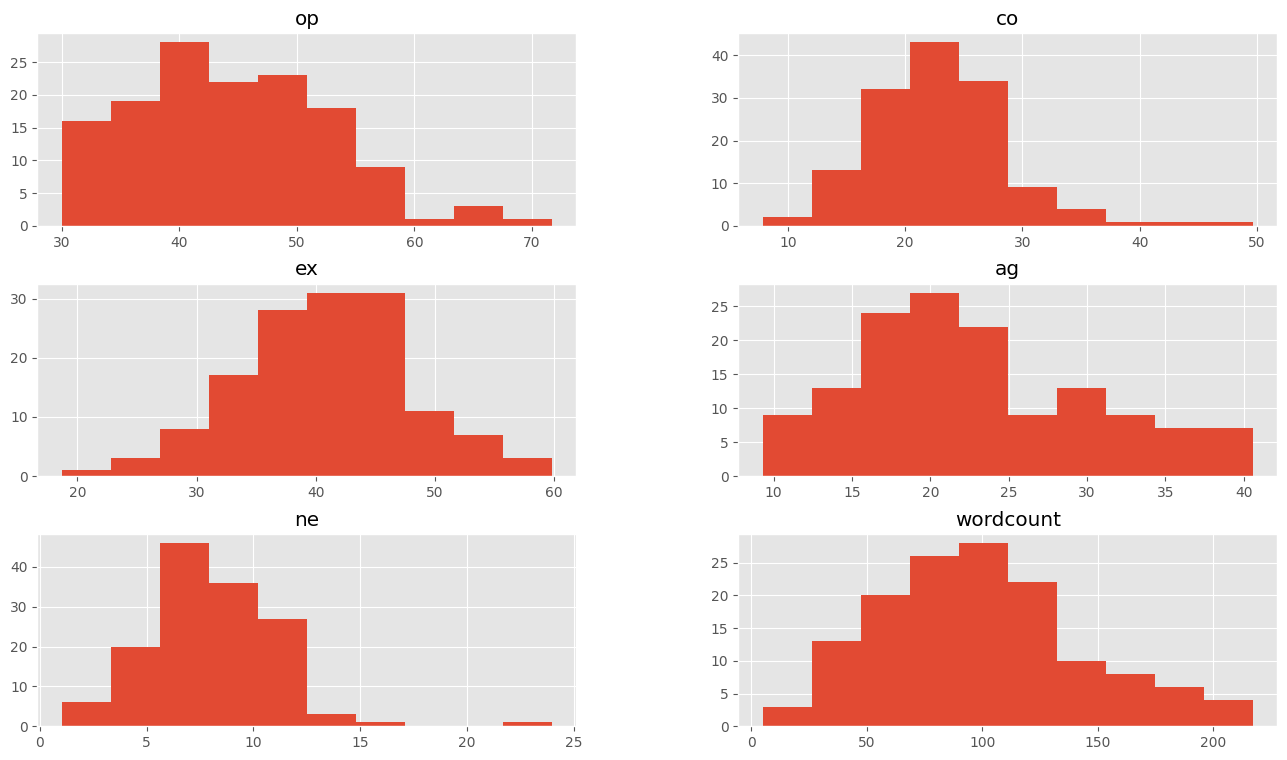

In [5]:
dataframe.drop(['categoria'],1).hist()
plt.show()

# Exploración Visual de Relaciones entre Variables y Categorización
 `sb.pairplot(dataframe.dropna(), hue='categoria', height=3, vars=["op","ex","ag"], kind='scatter')`:
   - `sb.pairplot()`: Esta es una función de Seaborn que crea un conjunto de gráficos de pares basados en un DataFrame. Cada gráfico de par representa la relación entre dos variables numéricas diferentes.
   - `dataframe.dropna()`: Esto se utiliza para eliminar filas que contienen valores nulos (NaN) del DataFrame antes de crear los gráficos. Esto es útil para garantizar que los gráficos se generen correctamente sin valores faltantes.
   - `hue='categoria'`: El parámetro `hue` se utiliza para colorear los puntos en los gráficos de acuerdo con los valores de la columna 'categoria'. Cada color representará una categoría diferente en la columna 'categoria', lo que ayuda a visualizar la relación entre las variables en función de la categoría.
   - `height=3`: Este parámetro controla la altura de cada gráfico de par en pulgadas.
   - `vars=["op","ex","ag"]`: El parámetro `vars` especifica las variables que se utilizarán para crear los gráficos de pares. En este caso, se están considerando las variables "op", "ex" y "ag" del DataFrame.
   - `kind='scatter'`: El parámetro `kind` especifica el tipo de gráfico que se va a utilizar para representar las relaciones entre las variables. En este caso, se utiliza `'scatter'` para crear gráficos de dispersión.

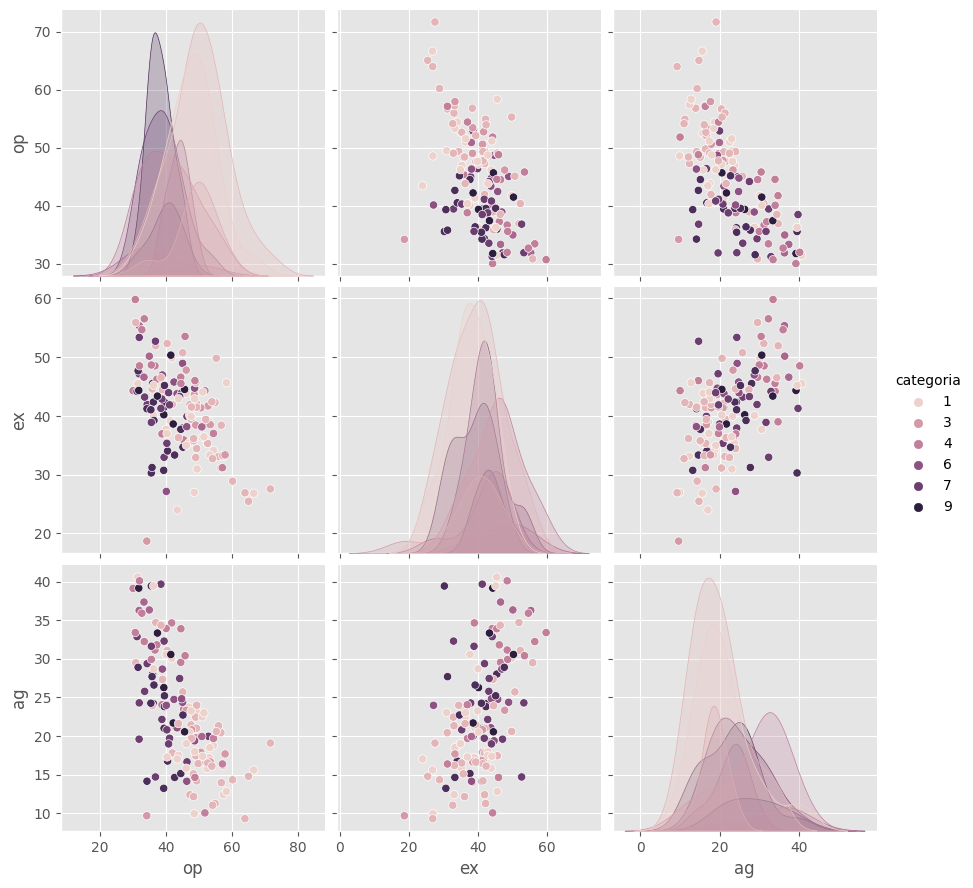

In [6]:
sb.pairplot(dataframe.dropna(), hue='categoria',height=3,vars=["op","ex","ag"],kind='scatter')

# Preparación de Datos para el Modelo de Aprendizaje Automático

1. `X = np.array(dataframe[["op","ex","ag"]])`: En esta línea, se crea una matriz NumPy `X` que contiene las características o variables independientes que se utilizarán como entradas para un modelo de aprendizaje automático. Estas características se extraen del DataFrame `dataframe`. Específicamente, se están seleccionando tres columnas del DataFrame: "op" (apertura), "ex" (extraversión) y "ag" (amabilidad). El resultado es una matriz NumPy que contiene estas tres columnas como características.

2. `y = np.array(dataframe['categoria'])`: En esta línea, se crea una matriz NumPy `y` que contiene la variable objetivo o etiquetas que se utilizan para entrenar y evaluar el modelo de aprendizaje automático. La variable objetivo se extrae del DataFrame `dataframe` y corresponde a la columna 'categoria'. El resultado es una matriz NumPy que contiene las etiquetas de categoría.

3. `X.shape`: Esta línea imprime la forma (shape) de la matriz `X`. La forma de una matriz es una tupla que indica el número de filas y columnas de la matriz. En este caso, `X.shape` te dará la cantidad de filas (muestras) y columnas (características) en la matriz `X`. Por ejemplo, si obtuvieras `(100, 3)` como resultado, significaría que tienes 100 muestras y 3 características en `X`.


In [7]:

X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

# Visualización 3D de Datos Multiclase

1. `fig = plt.figure()`: Esta línea crea una nueva figura de Matplotlib. Una figura es el lienzo o espacio en el que se colocarán los gráficos.

2. `ax = fig.add_subplot(111, projection='3d')`: Aquí se agrega un subplot tridimensional (3D) a la figura creada en el paso anterior. `ax` es el objeto que representa el subplot tridimensional. La opción `projection='3d'` especifica que este subplot será tridimensional.

3. `colores`: Es una lista de colores que se utilizarán para asignar un color específico a cada categoría en la variable objetivo 'y'. Cada elemento de esta lista corresponde a una categoría diferente.

4. `asignar = []`: Se crea una lista vacía llamada 'asignar' que se utilizará para asignar colores a los puntos en el gráfico en función de la categoría a la que pertenecen.

5. `for row in y: asignar.append(colores[row])`: Se recorre cada valor en la variable objetivo 'y', que representa la categoría a la que pertenece cada punto de datos en las características X. Se asigna un color de la lista 'colores' a cada valor de 'y' y se agrega a la lista 'asignar'. Esto se hace para que cada punto en el gráfico se coloree según su categoría.

6. `ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)`: Aquí se utiliza la función `scatter` de Matplotlib para crear el gráfico de dispersión tridimensional. Se pasan las siguientes argumentos:
   - `X[:, 0]`, `X[:, 1]`, `X[:, 2]`: Estos son los valores de las tres características que se representarán en los ejes x, y y z, respectivamente.
   - `c=asignar`: Se utiliza la lista 'asignar' para asignar colores a cada punto en el gráfico en función de su categoría.
   - `s=60`: Este argumento establece el tamaño de los puntos en el gráfico.

7. `plt.show()`: Finalmente, esta línea de código muestra el gráfico tridimensional en la pantalla.

C:\Users\hecto\AppData\Local\Temp\ipykernel_23124\4129591302.py:6: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)


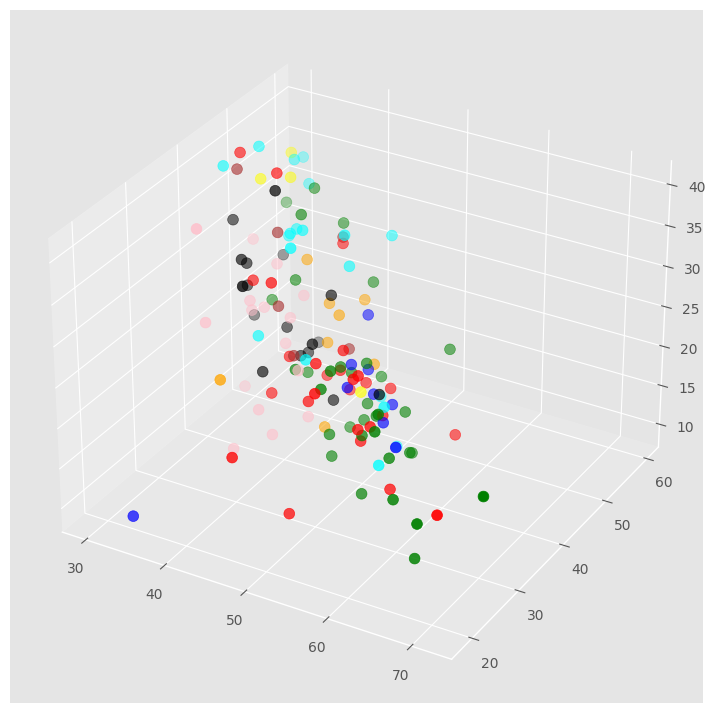

In [8]:
fig, ax =plt.subplots(subplot_kw = {"projection": "3d"})
colores = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown']#, 'purple']
asignar = []
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

plt.show()

# Visualización 3D de Datos en Diferentes Clústeres

1. `fig = plt.figure()`: Se crea una nueva figura de Matplotlib utilizando la función `figure()`. Esta figura se utilizará para colocar los gráficos en 3D.

2. `ax = fig.add_subplot(211, projection='3d')`: Se agrega un subplot 3D a la figura. `ax` se convierte en un objeto que representa el área en la que se dibujará el gráfico 3D. El argumento `211` significa que se está creando un subplot en una cuadrícula de 2x1 y que este subplot es el primero en la cuadrícula. El argumento `projection='3d'` indica que se trata de un gráfico tridimensional.

3. `colores = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown']`: Aquí se define una lista de colores que se utilizarán para asignar colores diferentes a los puntos de datos en el gráfico 3D. Estos colores se usarán para representar diferentes clústeres.

4. `asignar = []`: Se crea una lista vacía llamada `asignar`, que se utilizará para almacenar los colores asignados a cada punto de datos en función de su clúster.

5. `for row in y:`: Se inicia un bucle que itera a través de los elementos de la lista `y`. Presumiblemente, `y` contiene información sobre a qué clúster pertenece cada punto de datos.

6. `asignar.append(colores[row])`: Dentro del bucle, se asigna un color de la lista `colores` a cada punto de datos en función del valor en `y` (el clúster al que pertenece). El color se agrega a la lista `asignar`.

7. `ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)`: Se utiliza el objeto `ax` (subplot 3D) para crear un gráfico de dispersión tridimensional. Los valores de `X[:, 0]`, `X[:, 1]` y `X[:, 2]` representan las coordenadas x, y y z de los puntos de datos en el espacio tridimensional. Los colores de los puntos se determinan según la lista `asignar`, y `s=60` establece el tamaño de los puntos en el gráfico.

8. `plt.show()`: Finalmente, se muestra el gráfico 3D en una ventana gráfica o en el entorno de desarrollo de Python para visualizar los datos tridimensionales y su asignación a diferentes clústeres mediante colores.

C:\Users\hecto\AppData\Local\Temp\ipykernel_23124\1334227210.py:7: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)


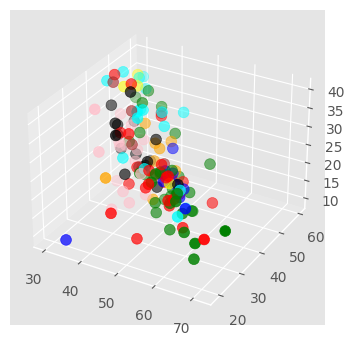

In [9]:
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
colores = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown']#, 'purple']
asignar = []
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

plt.show()

# Visualización de Datos en 3D con Asignación de Colores por Categoría

1. `fig = plt.figure()`: Se crea una figura de Matplotlib para contener el gráfico en 3D.

2. `ax = fig.add_subplot(111, projection='3d')`: Se añade un subplot 3D a la figura. Esto configura el entorno para crear un gráfico tridimensional.

3. `colores = ['red', 'red', 'red', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']`: Se define una lista de colores. Cada color en la lista se utilizará para representar una categoría específica de puntos de datos en el gráfico.

4. `asignar = []`: Se inicializa una lista vacía llamada `asignar` que se utilizará para almacenar los colores asignados a cada punto de datos.

5. `for row in y: asignar.append(colores[row])`: Se itera a través de la variable `y`, que probablemente contiene información de categoría o etiquetas para cada punto de datos. Para cada valor en `y`, se obtiene el color correspondiente de la lista de colores `colores` y se agrega a la lista `asignar`. De esta manera, se asigna un color específico a cada punto de datos según su categoría.

6. `ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)`: Se utiliza la función `scatter` de Matplotlib para crear un gráfico de dispersión en 3D. Los valores en `X[:, 0]`, `X[:, 1]` y `X[:, 2]` representan las coordenadas de los puntos de datos en las tres dimensiones. La opción `c=asignar` especifica que los colores de los puntos se asignarán según la lista `asignar`. El argumento `s=60` controla el tamaño de los puntos en el gráfico.

7. `plt.show()`: Finalmente, esta línea muestra el gráfico 3D con los puntos de datos coloreados según su categoría.

C:\Users\hecto\AppData\Local\Temp\ipykernel_23124\2528956066.py:7: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)


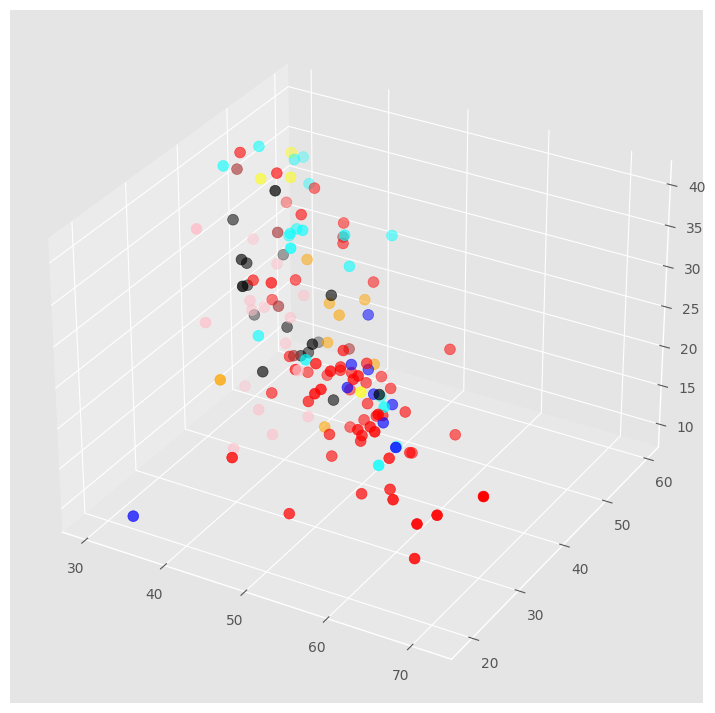

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colores = ['red', 'red', 'red', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
asignar = []
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

plt.show()

# Generación de Modelos K-Means con Diferentes Números de Clústeres

1. `Nc = range(1, 20)`: En esta línea, se crea una secuencia de números enteros que van desde 1 hasta 19 (inclusive). Estos números representarán diferentes números de clústeres que se probarán en el modelo K-Means.

2. `kmeans = [KMeans(n_clusters=i) for i in Nc]`: Aquí se utiliza una comprensión de lista para crear varios modelos K-Means con diferentes números de clústeres. La comprensión de lista itera sobre los valores en `Nc`, que representan el número de clústeres, y crea un modelo K-Means para cada valor utilizando `KMeans(n_clusters=i)`. Los modelos se almacenan en una lista llamada `kmeans`.

   - Por ejemplo, si `Nc` contiene los valores [1, 2, 3], entonces se crearán tres modelos K-Means con 1, 2 y 3 clústeres, respectivamente.

3. `kmeans`: Al final de la ejecución de este código, la variable `kmeans` será una lista que contiene múltiples objetos de modelo K-Means, cada uno con un número diferente de clústeres. Puedes acceder a estos modelos en la lista `kmeans` para ajustarlos a tus datos y realizar análisis posteriores.

In [11]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19)]

# Cálculo de Puntajes de Inercia para Evaluación de Modelos K-Means
1. `score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]`: En esta línea, se utiliza una comprensión de lista para calcular los puntajes de inercia para cada uno de los modelos K-Means almacenados en la lista `kmeans`. Aquí hay un desglose de lo que hace esta línea:

   - `for i in range(len(kmeans))`: Esto itera a través de los modelos K-Means almacenados en la lista `kmeans`. `len(kmeans)` devuelve la cantidad de modelos K-Means en la lista, y `range(len(kmeans))` genera un rango de índices desde 0 hasta la longitud de la lista de modelos.

   - `kmeans[i].fit(X)`: Esto ajusta el modelo K-Means en la posición `i` de la lista `kmeans` a los datos de entrada `X`.

   - `.score(X)`: Después de ajustar el modelo a los datos, esta parte calcula el puntaje de inercia del modelo en función de los datos de entrada `X`. El puntaje de inercia es una medida de cuánto se dispersan los puntos de datos dentro de los clústeres en el modelo K-Means. Cuanto menor sea el puntaje de inercia, mejor será el ajuste del modelo a los datos.

2. `score`: Al final de la ejecución de este código, la variable `score` contendrá una lista de puntajes de inercia, donde cada puntaje corresponde a un modelo K-Means con un número diferente de clústeres. Cada puntaje representa cuán bien se ajusta el modelo a los datos en función del número de clústeres.

In [12]:
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]
score

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[25194.039352766315,
 12632.031536945233,
 9963.41735742936,
 8357.034936746013,
 6987.12474927607,
 6097.307141455753,
 5521.070579483071,
 4978.644399196288,
 4448.3314380708,
 3990.834994003356,
 3764.095840315586,
 3409.3635545479506,
 3223.057677319584,
 3005.049056594617,
 2774.2633518124658,
 2615.1994085126503,
 2537.3157463059847,
 2482.476740379701,
 2301.731417021458]

# Curva del Codo: Selección del Número Óptimo de Clústeres

1. `plt.plot(Nc, score)`: Esta línea crea un gráfico de líneas utilizando la función `plot` de Matplotlib. `Nc` es una lista (o arreglo) que contiene los números de clusters que se están evaluando, y `score` es una lista (o arreglo) que contiene los puntajes (scores) asociados a cada número de clusters. Los puntajes generalmente representan alguna medida de la calidad de la agrupación, como la suma de las distancias entre los puntos y sus centroides en el caso de K-Means. Esta línea de código traza la relación entre el número de clusters (en el eje x) y el puntaje (en el eje y).

2. `plt.xlabel('Number of Clusters')`: Esta línea agrega una etiqueta al eje x del gráfico, indicando que representa el "Número de Clusters."

3. `plt.ylabel('Score')`: Similarmente, esta línea agrega una etiqueta al eje y del gráfico, indicando que representa el "Puntaje" o la medida de calidad de la agrupación.

4. `plt.title('Elbow Curve')`: Aquí se establece el título del gráfico como "Elbow Curve" (Curva del Codo). El término "Elbow" se refiere a un punto en el gráfico donde la curva comienza a aplanarse, y a menudo es un indicador del número óptimo de clusters. Este punto es como el codo de un brazo doblado.

5. `plt.show()`: Finalmente, esta línea muestra el gráfico en una ventana gráfica o en el entorno de desarrollo de Python, para que el usuario pueda visualizar la Curva del Codo y analizarla.

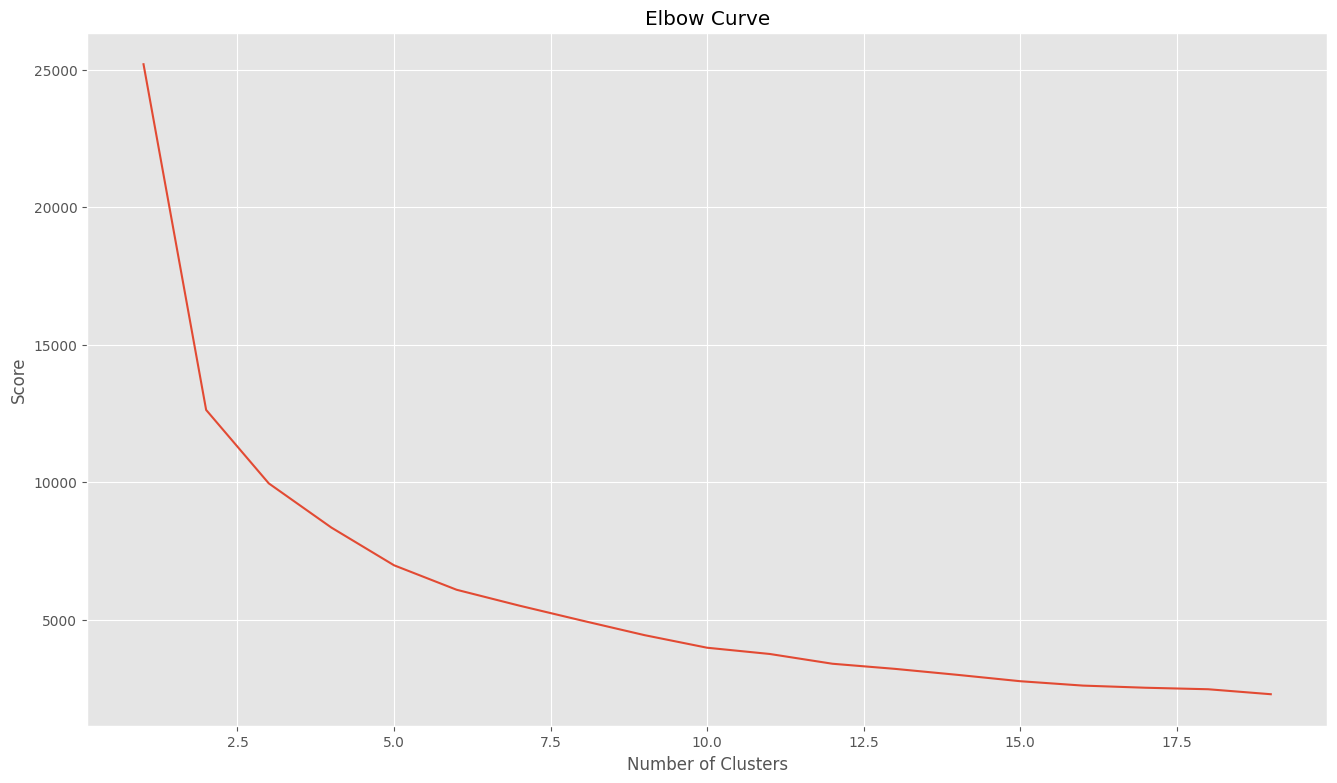

In [14]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Configuración y Visualización de Centroides en el Modelo K-Means

1. `kmeans = KMeans(n_clusters=5).fit(X)`: En esta línea, se crea una instancia del modelo K-Means utilizando la clase `KMeans` de la biblioteca de aprendizaje automático de Python, como scikit-learn (asegúrate de haber importado `KMeans` previamente). Se configura el número de clusters en 5 mediante el argumento `n_clusters=5`. Luego, se ajusta el modelo a los datos `X` utilizando el método `.fit(X)`.

   - `n_clusters=5`: Esto especifica que deseas dividir los datos en 5 clusters. K-Means intentará encontrar 5 centroides para agrupar los datos en grupos que minimicen la distancia entre los puntos y su centroide más cercano.

2. `centroids = kmeans.cluster_centers_`: Después de ajustar el modelo K-Means a los datos, puedes acceder a los centroides de los clusters mediante la propiedad `cluster_centers_` del objeto `kmeans`. En esta línea, se extraen los centroides y se almacenan en la variable `centroids`.

   Los centroides son puntos que representan el centro geométrico de cada uno de los clusters. Son los puntos a los que tienden a agruparse los datos en cada cluster, y son útiles para comprender la estructura de los grupos resultantes.

3. `print(centroids)`: Por último, esta línea imprime los centroides en la consola o en la salida estándar. Los centroides se muestran como una matriz en la que cada fila corresponde a un centroide de un cluster y cada columna representa las coordenadas de ese centroide en el espacio de características.

In [15]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[39.52831892 42.88068556 24.35877208]
 [59.25320707 31.29770653 15.9896352 ]
 [43.3644665  31.89755772 19.50586767]
 [35.86526147 48.13229467 34.1429713 ]
 [49.99285115 40.87133549 17.47411785]]


# Configuración y Visualización de Centroides en K-Means

1. `kmeans = KMeans(n_clusters=5).fit(X)`: En esta línea, se crea una instancia del modelo K-Means utilizando la clase `KMeans` de la biblioteca de aprendizaje automático de Python, como scikit-learn (asegúrate de haber importado `KMeans` previamente). Se configura el número de clusters en 5 mediante el argumento `n_clusters=5`. Luego, se ajusta el modelo a los datos `X` utilizando el método `.fit(X)`.

   - `n_clusters=5`: Esto especifica que deseas dividir los datos en 5 clusters. K-Means intentará encontrar 5 centroides para agrupar los datos en grupos que minimicen la distancia entre los puntos y su centroide más cercano.

2. `centroids = kmeans.cluster_centers_`: Después de ajustar el modelo K-Means a los datos, puedes acceder a los centroides de los clusters mediante la propiedad `cluster_centers_` del objeto `kmeans`. En esta línea, se extraen los centroides y se almacenan en la variable `centroids`.

   Los centroides son puntos que representan el centro geométrico de cada uno de los clusters. Son los puntos a los que tienden a agruparse los datos en cada cluster, y son útiles para comprender la estructura de los grupos resultantes.

3. `print(centroids)`: Por último, esta línea imprime los centroides en la consola o en la salida estándar. Los centroides se muestran como una matriz en la que cada fila corresponde a un centroide de un cluster y cada columna representa las coordenadas de ese centroide en el espacio de características.

C:\Users\hecto\AppData\Local\Temp\ipykernel_23124\3238885179.py:12: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
C:\Users\hecto\AppData\Local\Temp\ipykernel_23124\3238885179.py:13: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)


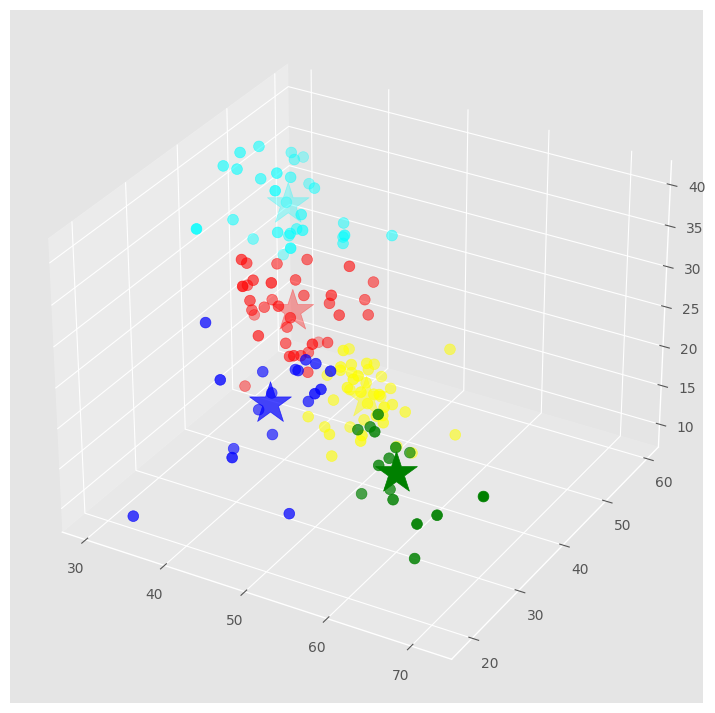

In [26]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])


fig, ax =plt.subplots(subplot_kw = {"projection": "3d"})
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

# Visualización de Datos y Centroides en un Gráfico de Dispersión

1. `f1 = dataframe['op'].values` y `f2 = dataframe['ex'].values`: Estas dos líneas extraen los valores de las columnas 'op' y 'ex' de un DataFrame llamado `dataframe` y los almacenan en las variables `f1` y `f2`, respectivamente. Presumiblemente, 'op' y 'ex' son dos características de los datos que se desean visualizar en el gráfico de dispersión.

2. `plt.scatter(f1, f2, c=asignar, s=70)`: Esta línea utiliza la función `scatter` de la biblioteca Matplotlib para crear un gráfico de dispersión. Los valores de `f1` se colocan en el eje x y los valores de `f2` en el eje y. La variable `asignar` se utiliza para especificar los colores de los puntos en el gráfico. Los argumentos `c` y `s` controlan el color y el tamaño de los puntos, respectivamente. En este contexto, `asignar` probablemente contiene información sobre a qué clúster pertenece cada punto de datos, y se utiliza para colorear los puntos en función de su asignación a un clúster.

3. `plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)`: Esta línea agrega marcadores en forma de estrellas (`marker='*'`) en el gráfico de dispersión para representar los centroides de los clústeres. Los centroides se extraen de la variable `C`, que probablemente contiene las coordenadas de los centroides de los clústeres. El argumento `c` se utiliza para especificar colores diferentes para cada centroide, y el argumento `s` controla el tamaño de los marcadores.

4. `plt.show()`: Esta línea muestra el gráfico de dispersión generado con Matplotlib.

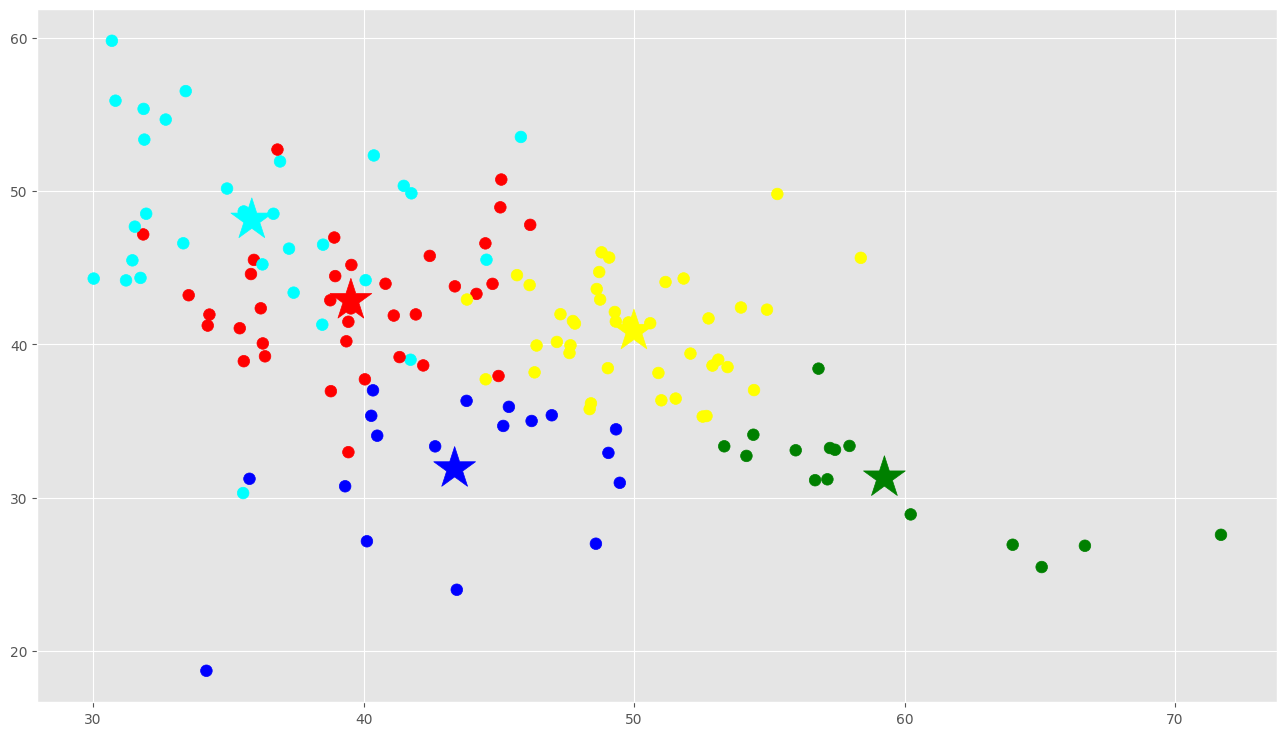

In [17]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

# Visualización de datos y centroides en un gráfico de dispersión


1. `f1 = dataframe['op'].values` y `f2 = dataframe['ag'].values`: Estas dos líneas extraen los valores de dos características (variables) de un DataFrame llamado `dataframe`. `f1` y `f2` son arrays NumPy que contienen los valores de las columnas 'op' y 'ag' del DataFrame, respectivamente.

2. `plt.scatter(f1, f2, c=asignar, s=70)`: Esta línea crea un gráfico de dispersión utilizando los valores de `f1` en el eje x y los valores de `f2` en el eje y. La variable `asignar` se utiliza para especificar los colores de los puntos en el gráfico de dispersión. Cada punto en el gráfico representa un punto de datos en el DataFrame, donde las coordenadas x e y corresponden a los valores de 'op' y 'ag' respectivamente. El argumento `s` controla el tamaño de los puntos en el gráfico.

3. `plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)`: Esta línea agrega los centroides calculados para los clústeres al gráfico de dispersión. `C` es una matriz que contiene las coordenadas de los centroides, donde `C[:, 0]` representa las coordenadas x de los centroides y `C[:, 2]` representa las coordenadas y. El argumento `marker='*'` establece que se utilizará un asterisco como marcador para los centroides. El argumento `c=colores` permite asignar colores diferentes a los centroides. El argumento `s=1000` controla el tamaño de los centroides en el gráfico.

4. `plt.show()`: Esta línea muestra el gráfico de dispersión con los puntos de datos y los centroides.


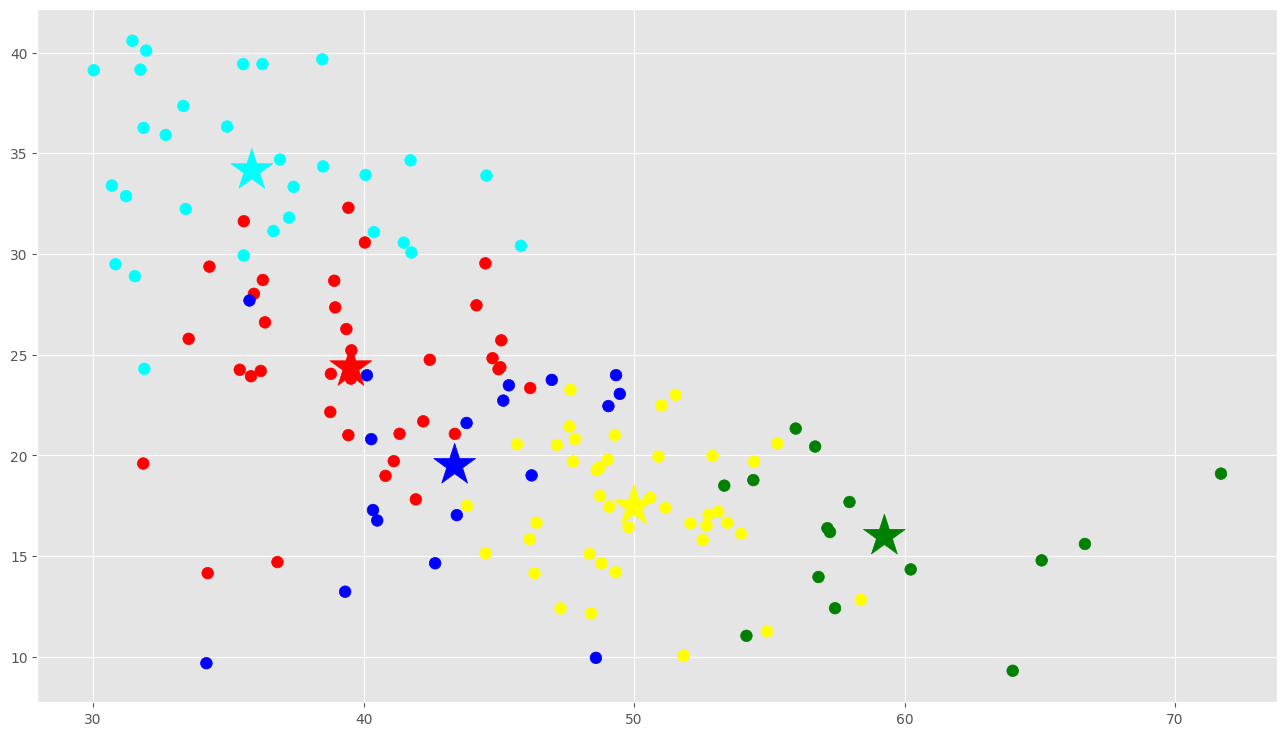

In [18]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

# Visualización de Clústeres Utilizando Matplotlib

1. `f1 = dataframe['ex'].values` y `f2 = dataframe['ag'].values`: Estas dos líneas extraen dos características o columnas del DataFrame `dataframe` y las almacenan en las variables `f1` y `f2`. Estas características son utilizadas para representar los datos en el gráfico de dispersión (scatter plot).

2. `plt.scatter(f1, f2, c=asignar, s=70)`: Esta línea de código crea un gráfico de dispersión en el que se representan los puntos de datos de las características `f1` y `f2`. Los parámetros `c` y `s` controlan el color y el tamaño de los puntos respectivamente. El argumento `c=asignar` indica que los puntos se colorearán según la variable `asignar`, que probablemente contiene información sobre a qué clúster pertenece cada punto.

3. `plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)`: Esta línea agrega puntos adicionales al gráfico de dispersión. Los puntos representan los centroides de los clústeres calculados por algún algoritmo de agrupamiento previo. `C[:, 1]` y `C[:, 2]` se refieren a las coordenadas x e y de los centroides. Los parámetros `marker`, `c` y `s` controlan el marcador (en este caso, un asterisco), el color y el tamaño de los centroides respectivamente.

4. `plt.show()`: Finalmente, esta línea muestra el gráfico de dispersión en la pantalla.


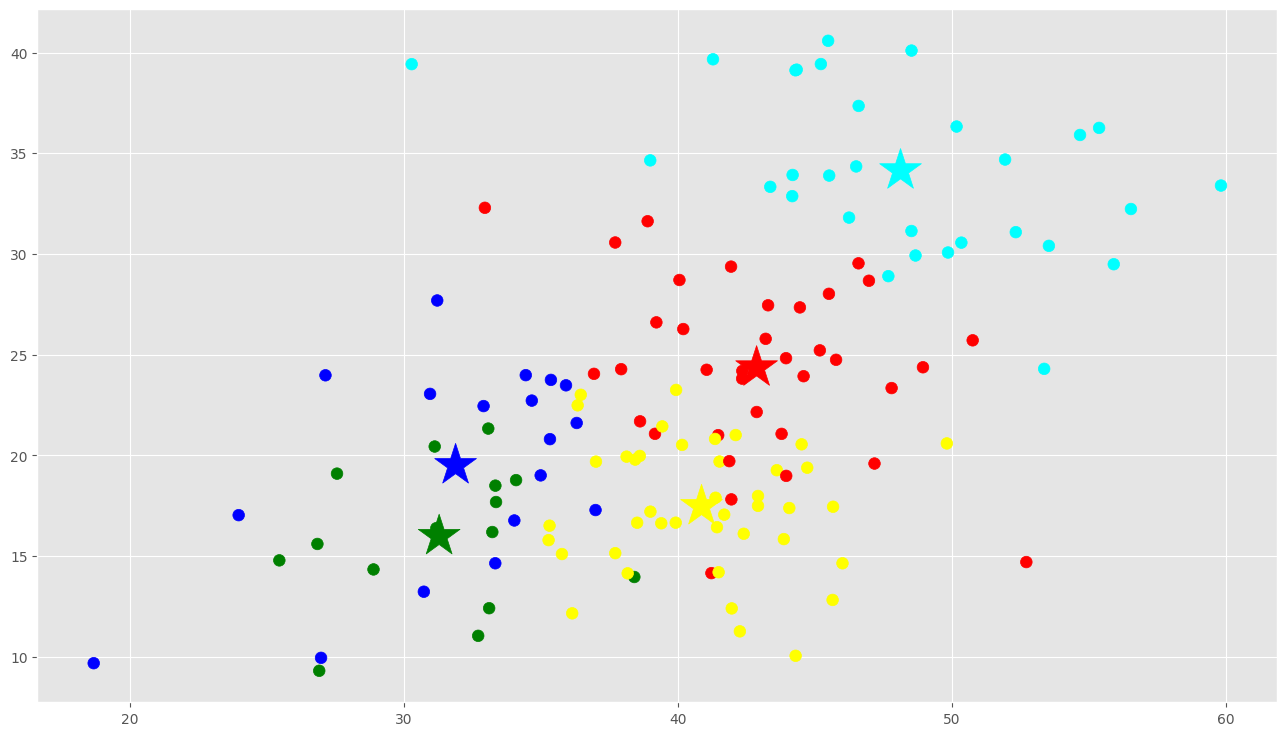

In [19]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

# Análisis de Grupos y Conteo de Elementos en un DataFrame con Pandas

1. Se crea un DataFrame vacío llamado `copy` utilizando `pd.DataFrame()`. Este DataFrame se utilizará para almacenar datos seleccionados de otro DataFrame llamado `dataframe`.

2. Se copian las columnas 'usuario' y 'categoria' del DataFrame `dataframe` en el DataFrame `copy`. Esto se hace mediante la asignación de los valores de estas columnas a las columnas correspondientes en `copy`. Como resultado, `copy` contendrá tres columnas: 'usuario', 'categoria' y 'label'. Las dos primeras columnas se copian directamente desde `dataframe`, mientras que la columna 'label' se crea posteriormente y se le asigna un valor.

3. Se crea un nuevo DataFrame llamado `cantidadGrupo` que se utilizará para almacenar información sobre los grupos y la cantidad de elementos en cada grupo.

4. En la columna 'color' de `cantidadGrupo`, se asignan los valores de la lista `colores`. Esto sugiere que `colores` probablemente contiene información sobre los colores asociados a cada grupo.

5. En la columna 'cantidad' de `cantidadGrupo`, se calcula la cantidad de elementos en cada grupo utilizando la función `groupby()` y `size()` en el DataFrame `copy`. Esto agrupa los datos en `copy` por la columna 'label' y calcula el tamaño de cada grupo, es decir, cuántos elementos pertenecen a cada uno de los grupos.


In [20]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,36
1,green,15
2,blue,18
3,cyan,30
4,yellow,41


 # Análisis de Diversidad de Categorías en un Grupo Específico


1. `group_referrer_index = copy['label'] == 4`: En esta línea, se crea una máscara booleana llamada `group_referrer_index` que verifica si los valores en la columna 'label' del DataFrame `copy` son iguales a 4. Esto se utiliza para filtrar el grupo de datos que pertenece a la etiqueta (o categoría) 4.

2. `group_referrals = copy[group_referrer_index]`: Aquí, se crea un nuevo DataFrame llamado `group_referrals` que contiene solo las filas de `copy` que cumplen con la condición establecida en la línea anterior. En otras palabras, `group_referrals` contiene los datos del grupo que pertenece a la etiqueta 4.

3. `diversidadGrupo = pd.DataFrame()`: Se inicializa un nuevo DataFrame llamado `diversidadGrupo` vacío. Este DataFrame se utilizará para calcular y almacenar la diversidad de categorías en el grupo.

4. `diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]`: Se agrega una columna llamada 'categoria' a `diversidadGrupo` con valores del 0 al 9. Esto se hace para representar todas las categorías posibles que se van a analizar.

5. `diversidadGrupo['cantidad'] = group_referrals.groupby('categoria').size()`: En esta línea, se calcula la cantidad de elementos en cada categoría dentro del grupo de referencia (`group_referrals`). Se utiliza el método `groupby()` para agrupar los datos por la columna 'categoria' y luego `size()` para contar la cantidad de elementos en cada grupo.

Al finalizar este código, el DataFrame `diversidadGrupo` contendrá dos columnas: 'categoria' y 'cantidad'. La columna 'categoria' representa las categorías posibles, y la columna 'cantidad' representa la cantidad de elementos en el grupo que pertenecen a cada categoría. Esto proporciona información sobre la diversidad de categorías dentro del grupo específico con la etiqueta 4.

In [21]:
group_referrer_index = copy['label'] ==4
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,11.0
2,2,14.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,1.0


# Determinando el Usuario Representante Más Cercano a Cada Centroid en K-Means

1. `closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)`: En esta línea, se está utilizando la función `pairwise_distances_argmin_min` para calcular dos cosas:
   - `closest`: Es un array que contendrá los índices de los puntos de datos en el conjunto de datos `X` que son los más cercanos a cada uno de los centroides del modelo K-Means. En otras palabras, para cada centroide, `closest` almacenará el índice del punto de datos que está más cerca de ese centroide.
   - `_`: En este caso, `_` se utiliza para descartar el segundo valor de retorno de la función `pairwise_distances_argmin_min`, que es la distancia mínima entre los centroides y los puntos de datos más cercanos. Como no estamos interesados en estas distancias mínimas en este momento, usamos `_` para indicar que no las almacenamos.

2. `closest`: Finalmente, se imprime el contenido del array `closest`. Esto mostrará los índices de los puntos de datos que son los más cercanos a cada centroide en el modelo K-Means.

In [22]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 64,  82, 123, 121,  21], dtype=int64)

# Impresión de Usuarios Más Cercanos en un DataFrame

1. `users = dataframe['usuario'].values`: En esta línea, se crea una variable `users` que almacena los valores de la columna 'usuario' del DataFrame. Esto implica que `users` contendrá una serie de nombres de usuario extraídos del DataFrame.

2. `for row in closest:`: Esto inicia un bucle `for` que iterará a través de los elementos de la lista `closest`. Presumiblemente, `closest` es una lista de índices o posiciones en el DataFrame que representan los usuarios más cercanos o relevantes en algún contexto.

3. `print(users[row])`: En cada iteración del bucle, este código imprime el nombre de usuario correspondiente al índice `row` en la lista `closest`. Esto significa que imprimirá los nombres de usuario de los usuarios más cercanos o relevantes uno por uno, en el orden en que aparecen en la lista `closest`.


In [23]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

ierrejon
JudgeJudy
SJP
SerranoIsmael
carmenelectra


# Explicación del Proceso de Predicción de Clústeres con K-Means
1. `X_new = np.array([[45.92,57.74,15.66]])`: En esta línea, se crea una nueva matriz NumPy llamada `X_new` que contiene un solo punto de datos. Este punto de datos tiene tres características (variables) con valores 45.92, 57.74 y 15.66. La forma de la matriz `X_new` será (1, 3), lo que significa que tiene una fila y tres columnas.

2. `new_labels = kmeans.predict(X_new)`: En esta línea, se utiliza un modelo K-Means previamente entrenado llamado `kmeans` para predecir a qué clúster pertenece el punto de datos en `X_new`. El método `predict()` del modelo K-Means toma un conjunto de datos y asigna cada punto de datos a uno de los clústeres identificados por el modelo durante el entrenamiento.

3. `print(new_labels)`: Finalmente, esta línea imprime la etiqueta o el número de clúster al que se ha asignado el punto de datos en `X_new`. El valor impreso es un número entero que representa el clúster al que pertenece el punto de datos según el modelo K-Means.

In [24]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[4]
